In [1]:
import pandas as pd
from apyori import apriori

In [2]:
df = pd.read_csv('45w.csv',encoding = 'gbk')
df_c = df
df = df.dropna(subset=['FIRST_CALL_MSC_CELLID'])


In [3]:
df.describe()

,OP_TIME,AGENT_ID,USER_ID,SUM(SETT_CHARGE_201706),ACC_NBR,MAIN_PP_ID,USER_ONLINE_DURA,FEE,G4_YICHANG_ESN_FLAG,G4_YICHANG_SERV_FLAG,CALL_DURATION,CALL_TIMES,SMS_TIMES,IX_KBYTES,ACTIVE_FLAG,LEASE_FLAG,ACTIVE_DAY_NUM,JWQ_NUM,OPP_NBR
count,326025.0,326025.000000,3.260250e+05,326025.000000,3.260250e+05,3.260250e+05,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.0,326025.000000,326025.000000,326025.000000,1.809900e+05
mean,201706.0,33836.253573,1.030509e+11,8323.248564,1.730452e+10,8.268138e+08,4.895717,7219.550341,0.573226,0.212122,106.715323,126.051800,2.327996,462.915217,1.0,0.997239,16.115007,28.571947,1.665991e+10
std,0.0,18319.596787,1.698616e+08,10234.268261,1.121885e+09,3.661552e+08,2.002092,6257.714529,0.494610,0.408811,233.826558,383.869926,135.791338,674.376877,0.0,0.052468,7.377599,256.871374,1.761540e+09
min,201706.0,1030.000000,1.020119e+11,-53700.000000,1.330102e+10,2.000100e+04,1.000000,-9240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.106131e+10
25%,201706.0,19050.000000,1.030499e+11,2580.000000,1.731098e+10,9.930250e+08,4.000000,4500.000000,0.000000,0.000000,5.550000,9.000000,0.000000,73.876953,1.0,1.000000,11.000000,0.000000,1.532197e+10
50%,201706.0,41411.000000,1.030507e+11,3380.000000,1.771003e+10,9.930250e+08,5.000000,6300.000000,1.000000,0.000000,43.916667,29.000000,0.000000,289.291992,1.0,1.000000,18.000000,1.000000,1.731943e+10
75%,201706.0,48453.000000,1.030514e+11,10000.000000,1.771079e+10,9.930340e+08,6.000000,8510.000000,1.000000,0.000000,128.766667,128.000000,1.000000,659.586914,1.0,1.000000,21.000000,5.000000,1.771048e+10
max,201706.0,66036.000000,2.000034e+11,107500.000000,1.891200e+10,9.930340e+08,90.000000,764630.000000,1.000000,1.000000,7782.066667,13846.000000,75713.000000,55697.640625,1.0,1.000000,30.000000,13554.000000,1.891200e+10


ID等字段换成字符串类型

In [4]:
df.AGENT_ID = df.AGENT_ID.astype('str')
df.USER_ID = df.USER_ID.astype('str')
df.MAIN_PP_ID = df.MAIN_PP_ID.astype('str')
df.OPP_NBR = df.OPP_NBR.astype('str')
df.ACC_NBR = df.ACC_NBR.astype('str')
df.describe()

D:\develop\Anaconda\envs\py27\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,OP_TIME,SUM(SETT_CHARGE_201706),USER_ONLINE_DURA,FEE,G4_YICHANG_ESN_FLAG,G4_YICHANG_SERV_FLAG,CALL_DURATION,CALL_TIMES,SMS_TIMES,IX_KBYTES,ACTIVE_FLAG,LEASE_FLAG,ACTIVE_DAY_NUM,JWQ_NUM
count,326025.0,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.000000,326025.0,326025.000000,326025.000000,326025.000000
mean,201706.0,8323.248564,4.895717,7219.550341,0.573226,0.212122,106.715323,126.051800,2.327996,462.915217,1.0,0.997239,16.115007,28.571947
std,0.0,10234.268261,2.002092,6257.714529,0.494610,0.408811,233.826558,383.869926,135.791338,674.376877,0.0,0.052468,7.377599,256.871374
min,201706.0,-53700.000000,1.000000,-9240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,201706.0,2580.000000,4.000000,4500.000000,0.000000,0.000000,5.550000,9.000000,0.000000,73.876953,1.0,1.000000,11.000000,0.000000
50%,201706.0,3380.000000,5.000000,6300.000000,1.000000,0.000000,43.916667,29.000000,0.000000,289.291992,1.0,1.000000,18.000000,1.000000
75%,201706.0,10000.000000,6.000000,8510.000000,1.000000,0.000000,128.766667,128.000000,1.000000,659.586914,1.0,1.000000,21.000000,5.000000
max,201706.0,107500.000000,90.000000,764630.000000,1.000000,1.000000,7782.066667,13846.000000,75713.000000,55697.640625,1.0,1.000000,30.000000,13554.000000


## 用Apriori进行关联规则挖掘

In [5]:
#转换list
agent_id = df.AGENT_ID.tolist()
main_id = df.MAIN_PP_ID.tolist()
first = df.FIRST_CALL_MSC_CELLID.tolist()
opp_nbr = df.OPP_NBR.tolist()
dept_id = df.USER_DEVELOP_DEPART_ID.tolist()

In [6]:

main_id_t = zip( 'm'*len(main_id),main_id)
first_t = zip( 'f'*len(first),first)
agent_id_t = zip( 'a'*len(agent_id),agent_id)
opp_nbr_t = zip( 'o'*len(opp_nbr),opp_nbr)
dept_id_t = zip( 'd'*len(dept_id),dept_id)


transaction = zip(agent_id_t,first_t,dept_id_t,first_t)
results = list(apriori(transaction,min_support=0.01)) 

结果解释:
此处取了支持度为0.01,意味着下面的规则发生的频最小是0.01,乘上总共的用户数
$$0.01 * 300000 = 3000$$
说明下面的每一条关联关系至少有3000名用户符合



In [7]:
[r for r in results if len(r.items)==2]

NameError: name 'results' is not defined

## 根据佣金占收比把客户聚类

In [8]:
df_c['rate'] = df['SUM(SETT_CHARGE_201706)']/df['FEE']

In [10]:
import numpy as np
df_c = df_c.replace([np.inf, -np.inf], np.nan).dropna(subset=["rate"], how="all")

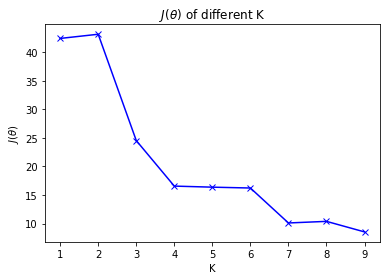

In [27]:

import numpy as np
K=range(1,10)
meandistortions=[]

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(
            X,kmeans.cluster_centers_,"euclidean"),axis=1))/X.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('K')
plt.ylabel(u'$J(\\theta)$')
plt.title(u'$J(\\theta)$ of different K')
plt.savefig('elbow.png')

根据肘部法则,取K = 4将用户聚成4类

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline
X = np.asarray(df_c['rate']).reshape(-1, 1)
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
df_c['class'] = kmeans.labels_

In [ ]:
df_c.columns

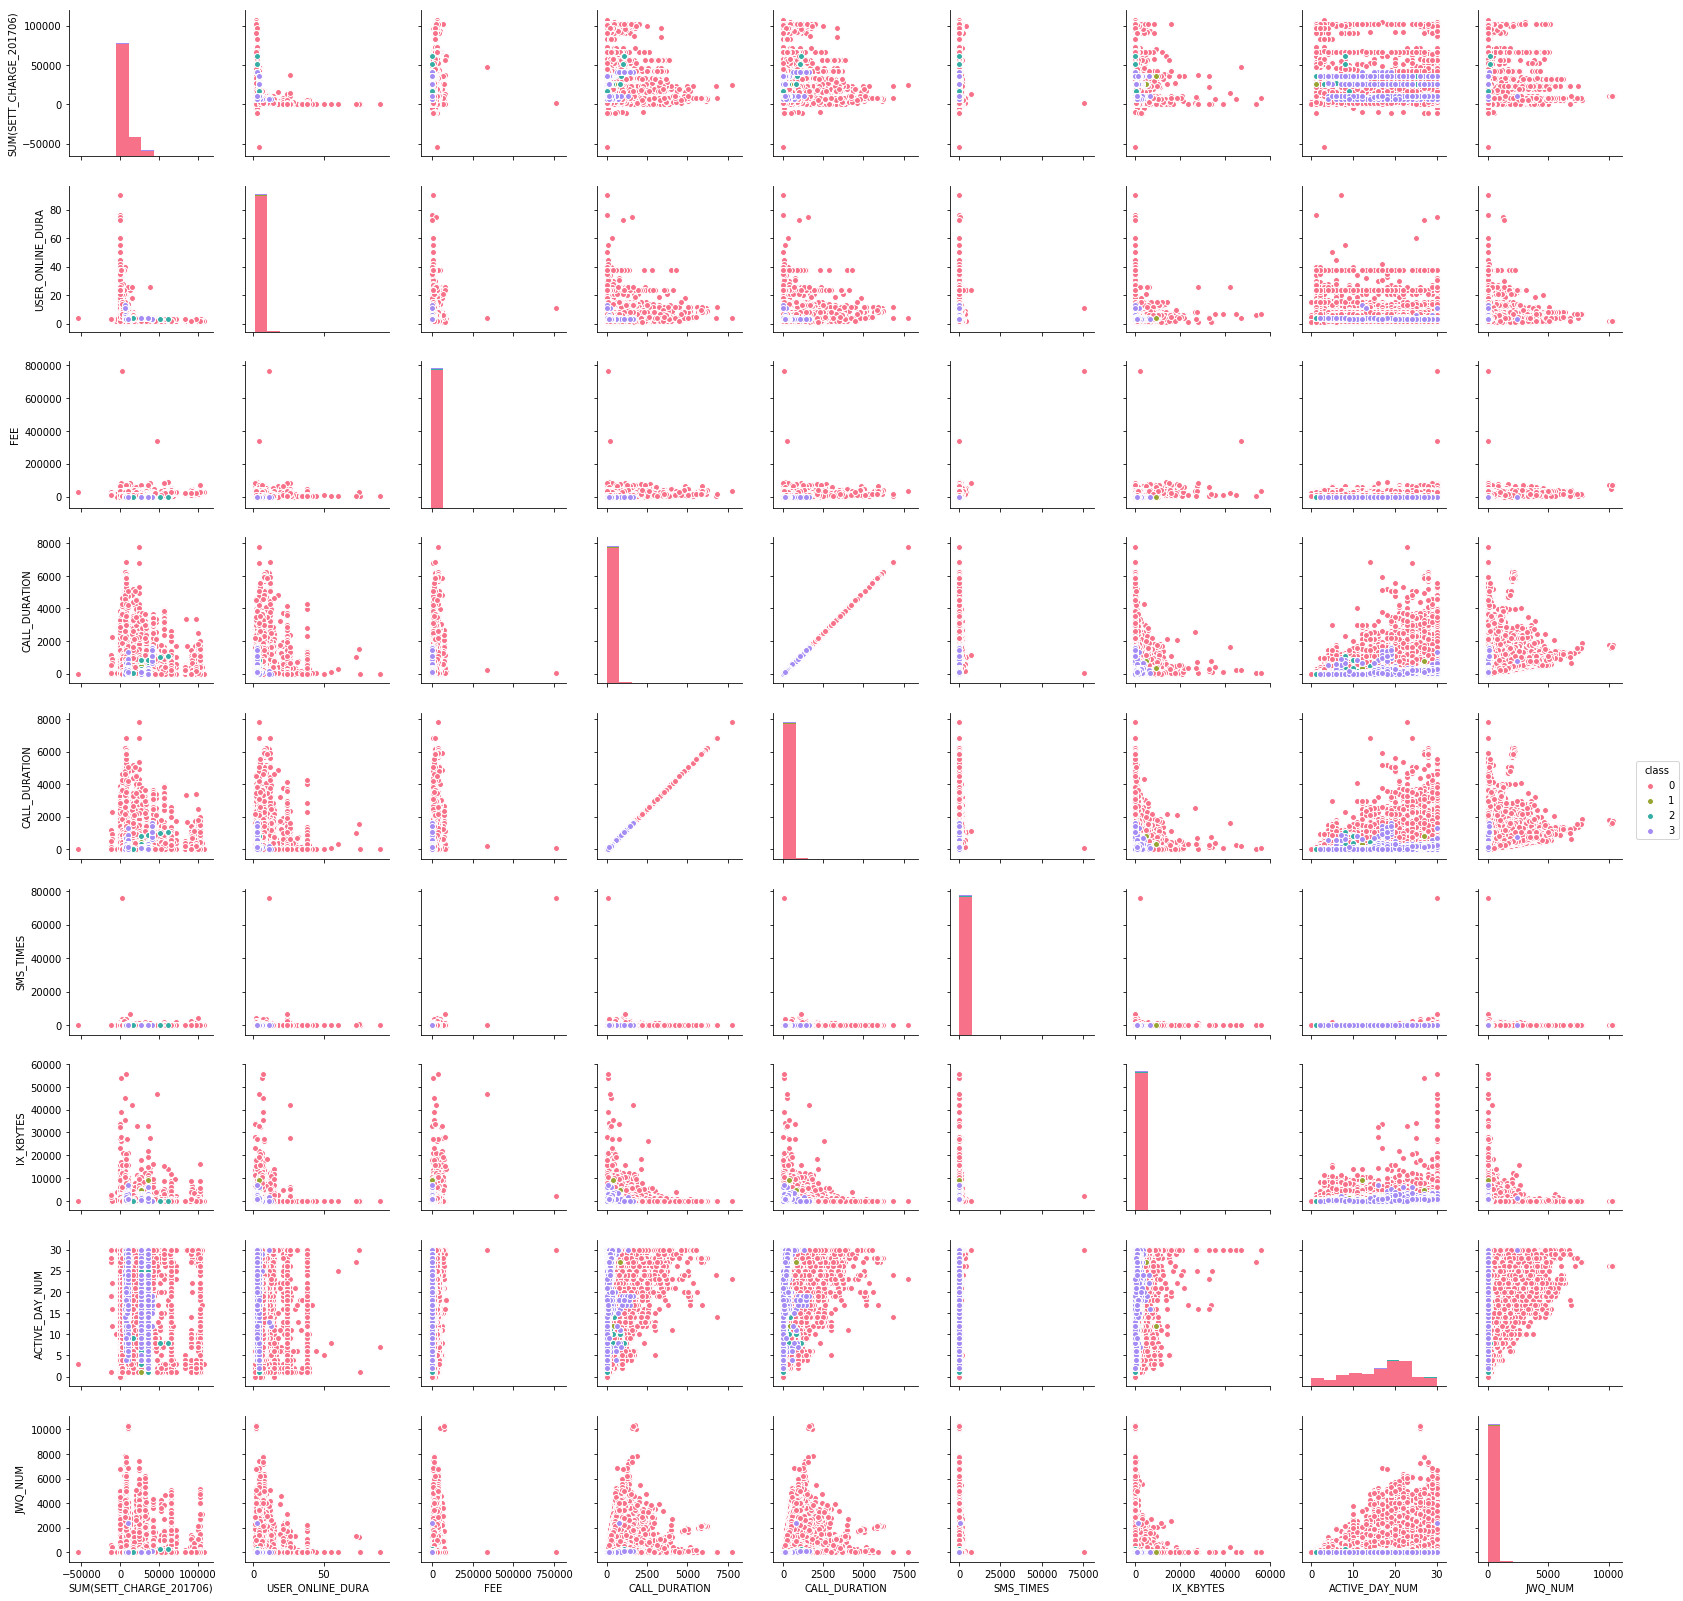

In [14]:
import seaborn as sns
g = sns.pairplot(df_c, vars=['SUM(SETT_CHARGE_201706)','USER_ONLINE_DURA','FEE','CALL_DURATION','CALL_DURATION','SMS_TIMES','IX_KBYTES','ACTIVE_DAY_NUM','JWQ_NUM'],hue='class', palette="husl")


In [15]:
g.savefig('plot.png')

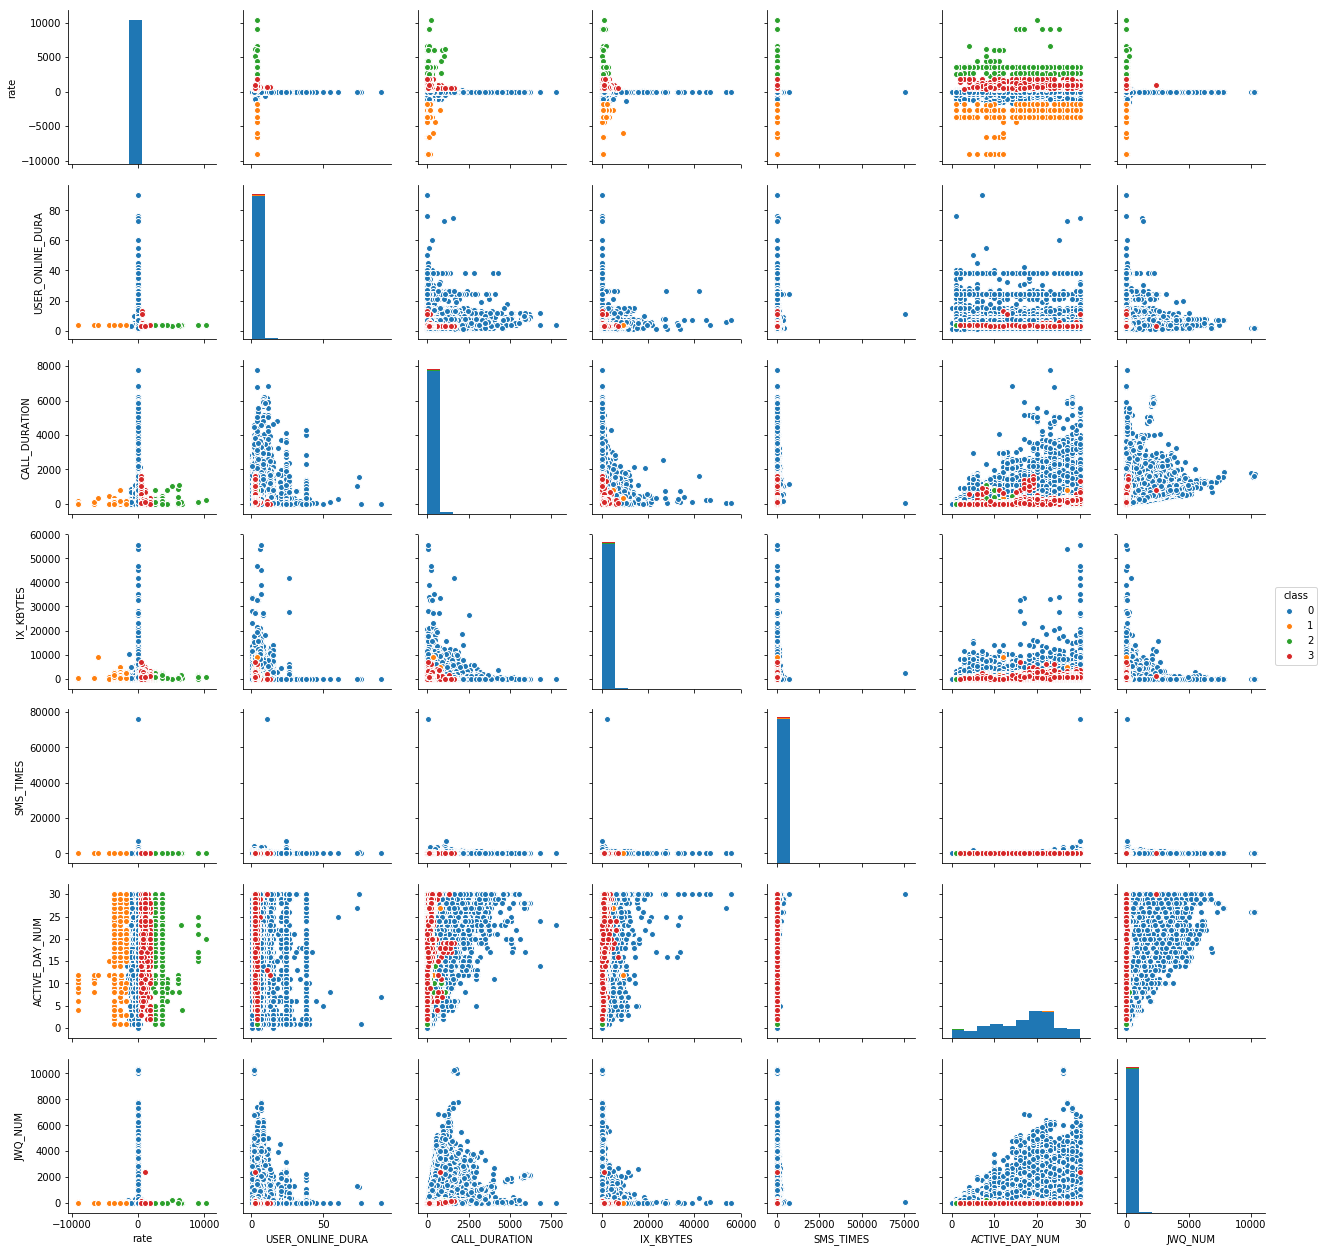

In [28]:
g = sns.pairplot(df_c, vars=['rate','USER_ONLINE_DURA','CALL_DURATION','IX_KBYTES','SMS_TIMES','ACTIVE_DAY_NUM','JWQ_NUM'],hue='class')
g.savefig('plot3.png')

In [26]:
g.savefig('plot2.png')

In [35]:
df_c['color'] = df_c['class']

In [36]:
df_c2 = df_c.replace(to_replace={'color':{'low':0,'neg':1,'middle':2,'high':3}})

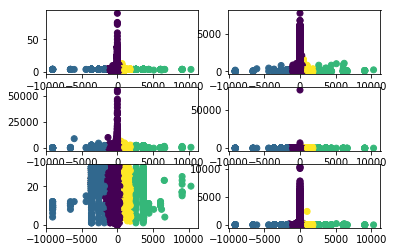

In [39]:

plt.subplot(321)
# sns.scatter()
plt.scatter(df_c2['rate'],df_c2['USER_ONLINE_DURA'],c=df_c2['color'])
plt.subplot(322)
plt.scatter(df_c2['rate'],df_c2['CALL_DURATION'],c=df_c2['color'])
plt.subplot(323)
plt.scatter(df_c2['rate'],df_c2['IX_KBYTES'],c=df_c2['color'])
plt.subplot(324)
plt.scatter(df_c2['rate'],df_c2['SMS_TIMES'],c=df_c2['color'])
plt.subplot(325)
plt.scatter(df_c2['rate'],df_c2['ACTIVE_DAY_NUM'],c=df_c2['color'])
plt.subplot(326)
plt.scatter(df_c2['rate'],df_c2['JWQ_NUM'],c=df_c2['color'])
plt.savefig('rate_detail.png')

## 假设检验:低佣金率用户各方面和高佣金用户行为的差异性


In [63]:
mean_d = df_c[['USER_ONLINE_DURA','CALL_DURATION','CALL_TIMES','SMS_TIMES','IX_KBYTES','ACTIVE_DAY_NUM','JWQ_NUM','class']].groupby(['class']).mean()


In [64]:
std_d = df_c[['USER_ONLINE_DURA','CALL_DURATION','CALL_TIMES','SMS_TIMES','IX_KBYTES','ACTIVE_DAY_NUM','JWQ_NUM','class']].groupby(['class']).std()

In [65]:
count_d= df_c[['USER_ONLINE_DURA','CALL_DURATION','CALL_TIMES','SMS_TIMES','IX_KBYTES','ACTIVE_DAY_NUM','JWQ_NUM','class']].groupby(['class']).count()

In [67]:
std_d

,USER_ONLINE_DURA,CALL_DURATION,CALL_TIMES,SMS_TIMES,IX_KBYTES,ACTIVE_DAY_NUM,JWQ_NUM
class,,,,,,,
high,0.544249,171.987045,307.006905,8.028480,704.244302,7.224806,54.437616
low,2.013746,235.415197,379.640820,137.977741,665.790651,7.383375,250.406983
middle,0.045502,98.590735,96.262746,0.826040,692.964447,6.817266,10.536574
neg,0.000000,64.515470,53.975801,0.813239,653.949456,5.590579,3.022062


In [68]:
mean_d

,USER_ONLINE_DURA,CALL_DURATION,CALL_TIMES,SMS_TIMES,IX_KBYTES,ACTIVE_DAY_NUM,JWQ_NUM
class,,,,,,,
high,3.249264,134.146892,145.322866,2.457802,576.300010,20.003435,6.357213
low,4.944561,106.342137,125.011082,2.339799,451.084756,15.986753,28.446933
middle,3.997927,81.855665,80.735751,1.655959,943.774765,19.935751,0.982383
neg,4.000000,104.187184,99.512640,0.884831,738.714643,22.431180,0.583567


In [69]:
count_d

,USER_ONLINE_DURA,CALL_DURATION,CALL_TIMES,SMS_TIMES,IX_KBYTES,ACTIVE_DAY_NUM,JWQ_NUM
class,,,,,,,
high,2038,2038,2038,2038,2038,2038,2038
low,315101,315101,315101,315101,315101,315101,315101
middle,965,965,965,965,965,965,965
neg,1424,1424,1424,1424,1424,1424,1424


In [57]:
mean = np.asarray(mean)
std = np.asanyarray(std)
count = np.asanyarray(count)
np.sq

In [61]:
mean

array([[  3.24926398e+00,   1.34146892e+02,   1.45322866e+02,
          2.45780177e+00,   5.76300010e+02,   2.00034347e+01,
          6.35721295e+00],
       [  4.94456063e+00,   1.06342137e+02,   1.25011082e+02,
          2.33979899e+00,   4.51084756e+02,   1.59867535e+01,
          2.84469329e+01],
       [  3.99792746e+00,   8.18556649e+01,   8.07357513e+01,
          1.65595855e+00,   9.43774765e+02,   1.99357513e+01,
          9.82383420e-01],
       [  4.00000000e+00,   1.04187184e+02,   9.95126404e+01,
          8.84831461e-01,   7.38714643e+02,   2.24311798e+01,
          5.83567416e-01]])

In [62]:
std

array([[  5.44249131e-01,   1.71987045e+02,   3.07006905e+02,
          8.02847996e+00,   7.04244302e+02,   7.22480644e+00,
          5.44376164e+01],
       [  2.01374563e+00,   2.35415197e+02,   3.79640820e+02,
          1.37977741e+02,   6.65790651e+02,   7.38337542e+00,
          2.50406983e+02],
       [  4.55015266e-02,   9.85907350e+01,   9.62627456e+01,
          8.26040296e-01,   6.92964447e+02,   6.81726638e+00,
          1.05365743e+01],
       [  0.00000000e+00,   6.45154700e+01,   5.39758006e+01,
          8.13239170e-01,   6.53949456e+02,   5.59057884e+00,
          3.02206171e+00]])

In [60]:
t = (mean[0,:]-mean[1,:])/np.sqrt(np.power(std[0,:],2)/count[0,:]+np.power(std[1,:],2)/count[1,:])

array([-134.78038395,    7.25453944,    2.97211035,    0.38894728,
          8.00358074,   25.0138991 ,  -17.18071996])

In [71]:
freedom = np.power(np.power(std[0,:],2)/count[0,:]+np.power(std[1,:],2)/count[1,:],2)/((1./(count[0,:]-1))*np.power(np.power(std[0,:],2)/count[0,:],2)+(1./(count[1,:]-1))*np.power(np.power(std[1,:],2)/count[1,:],2))

In [72]:
freedom

array([  2413.5842181 ,   2086.66598783,   2077.49050394,  16855.64811738,
         2060.61834163,   2064.61134911,   2632.36320147])

In [ ]:
# fenzi = np.power(np.power(std[0,:],2)/count[0,:]+np.power(std[1,:],2)/count[1,:],2)
# fenmu = ((1/(count[0,:]-1))*np.power(np.power(std[0,:],2)/count[0,:],2)+(1./(count[1,:]-1))*np.power(np.power(std[1,:],2)/count[1,:],2))

In [73]:
import scipy.stats
t_score = scipy.stats.t.isf(0.05 / 2, df = freedom )


In [74]:
t_score

array([ 1.96094735,  1.9611015 ,  1.96110653,  1.96010473,  1.96111589,
        1.96111366,  1.96086559])

## 查看聚类后的资费,代理商,基站落在哪里